# COMM 155 - HW 2

Import packages. You will use numpy, nltk, csv, matplotlib and SentimentIntensityAnalyzer (from nltk.sentiment.vader) in HW2.

In [14]:
##############################################################################
# TODO: Implement this code.                                                 #
##############################################################################

# import necessary packages
import numpy
import nltk
nltk.download('vader_lexicon')
import csv
import matplotlib
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from nltk.book import FreqDist


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kristentang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.


/Users/kristentang/anaconda2/envs/python3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


This function can be used to draw a box plot. 

rating_list: a list of numeric ratings given in the csv file

sentiment_list: a list of sentimeny analysis results obtained by NLTK

In [15]:
%matplotlib inline
def draw_box_plot(rating_list, sentiment_list):
    rset = sorted(set(rating_list))
    sentall = []
    for r in rset:
        sentlist = []
        for i, rval in enumerate(rating_list):
            if (rval == r):
                sentlist.append(sentiment_list[i])
        sentall.append(sentlist)

    matplotlib.pyplot.figure()
    matplotlib.pyplot.boxplot(sentall, labels=rset)
    matplotlib.pyplot.xlabel('Ratings')
    matplotlib.pyplot.ylabel('Sentiment')


Read amazon.csv file. You can use the csv.reader function.

In [16]:
##############################################################################
# TODO: Implement this code.                                                 #
##############################################################################


product_list=[] # product_list contains reviews (for each product, a list containing review + rating)

# open a csv file and read it line by line, adding each line to product_list 
with open('amazon.csv', 'r') as f:
    product = csv.reader(f.read().splitlines())
    for item in product: 
        product_list.append(item)

del product_list[0] # delete the header
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Calculate compound scores using the polarity_scores method. It may take a few minutes.

In [17]:
##############################################################################
# TODO: Implement this code.                                                 #
##############################################################################

sentiment_scores = [] # list of polarity_scores calculated by SentimentIntensityAnalyzer()
rating_scores=[] # list of ratings given by reviewer 

# add scores to lists for every individual list in product_list 
for product in product_list: 
    polarity = sid.polarity_scores(product[0]) # calculate polarity_score using review (first element in individual list) 
    sentiment_scores.append(polarity.get("compound")) # add polarity_score to sentiment_scores 
    rating_scores.append(product[1]) # add rating (second element in individual list) to rating_scores 

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Calculate the correlation between ratings and classified sentiments.

In [18]:
##############################################################################
# TODO: Implement this code.                                                 #
##############################################################################

# first, because rating_scores stored score as strings, must convert to int 
rating_scores_int = [int(float(x)) for x in rating_scores] 
# use numpy.corrcoef to calculate the correlation between 
# sentiment_scores (calculated by numpy) and rating_scores (given by reviewer)
print(numpy.corrcoef(rating_scores_int, sentiment_scores))

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[[1.         0.41715484]
 [0.41715484 1.        ]]


Draw a box plot using draw_box_plot()

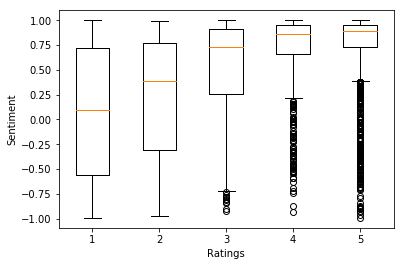

In [19]:
##############################################################################
# TODO: Implement this code.                                                 #
##############################################################################

# use provided code for draw_box_plot to create graph compairing scores calculated by numpy and given by reviewer
draw_box_plot(rating_scores_int, sentiment_scores) 

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

In [106]:
# ANALYSIS for amazon reviews

# create a list of lists containing the sentiment score, rating score, and review
# list (comparison) is sorted in ascending order by sentiment score 
pre_comparison = []
for i in range(len(rating_scores_int)): 
    pre_comparison.append([sentiment_scores[i], rating_scores_int[i], product_list[i][0]])
comparison=sorted(pre_comparison)

# create a string (negatives) containing the reviews of the 50 most negative reviews
# create a string (positives) containing the reviews of the 50 most positive reviews
negatives= ""
positives = ""
for i in range(50): 
    negatives += comparison[i][2]
    positives += comparison[-i-1][2]

### EXAMPLES OF REVIEWS THAT RECEIVED LOW SENTIMENT SCORES ###
# print the first 300 characters of the 3 reviews with the lowest sentiment score   
print ("Reviews with most negative sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, comparison[i][2][0:300]))

### EXAMPLES OF REVIEWS THAT RECEIVED HIGH SENTIMENT SCORES ###  
# print the first 300 characters of the 3 reviews with the highest sentiment score     
print ("\n Reviews with most positive sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, comparison[-i-1][2][0:300]))

# create a string containing all of the reviews 
product_2 = ""
for i in range(len(product_list)): 
    product_2 += product_list[i][0] 

# tokenize words in string (most negative, most positive, and all reviews) 
product_tokens = nltk.word_tokenize(product_2)    
negative_tokens = nltk.word_tokenize(negatives)
positive_tokens = nltk.word_tokenize(positives)

# create nltk text out of tokens (most negative, most positive, and all reviews) 
product_text = nltk.Text(product_tokens)
negative_text = nltk.Text(negative_tokens)
positive_text = nltk.Text(positive_tokens)

# create a frequency distribution of nltk words(most negative, most positive, and all reviews) 
product_fdist=FreqDist(product_text)
negative_fdist=FreqDist(negative_text)
positive_fdist=FreqDist(positive_text)

# find the 500 most common words to appear in all of the reviews 
product_common= []
for i in range(500): 
    product_common.append(product_fdist.most_common(500)[i][0])
product_common= set(product_common)

### PRINT WORDS WHOSE PRESENCE ARE CORRELATED WITH SENTIMENT SCORES ###
# find the 300 most common words to appear in 50 most negative reviews
# print the words that are uniquely associated with reviews with most negative sentiment scores

"""" 
these words are among the 300 most common words to appear in the negative reviews but not among 
the most common overall words. want to avoid including words that are recurring in negative reviews 
simply because they are common among the reviews in general 
"""
unique_negatives= []
for i in range(300): 
    n = negative_fdist.most_common(300)[i][0]
    if n not in product_common :
        unique_negatives.append(n)

print ("\nWords uniquely associated with reviews with most negative sentiment scores:")
print (unique_negatives)

# find the 300 most common words to appear in 50 most positive reviews
# print the words that are uniquely associated with reviews with most positive sentiment scores

"""" 
these words are among the 300 most common words to appear in the positive reviews but not among 
the most common overall words. want to avoid including words that are recurring in positive reviews 
simply because they are common among the reviews in general 
"""
unique_positives= []
for i in range(300): 
    n = positive_fdist.most_common(300)[i][0]
    if n not in product_common :
        unique_positives.append(n)
print ("\nWords uniquely associated with reviews with most positive sentiment scores:")
print (unique_positives)

Reviews with most negative sentiment scores: 
1.) i moved to PA from GA last june and i thought i would have to get my hair cut back off because my hair became dry and fragile. after a month or 2, i had finally got my dry and thirsty hair under control. well i thought i did at first. but after a couple months went by, the winter came and my hair be...
2.) OMG this product name/claims make it APPEAR to be &#34;natural&#34;, but its made out of horrible chemicals:.... Claims &#34;No Ammonia, No resorcinol, No parabens &#34; So what?...it contains:peg-2 oleamine, aqua (purified watter), cocamide dea, alcohol denat (alcohol), propylene glycol, oleic acid...
3.) OMG... this is horrible!!!! My baby doesnt have a sensitive skin... but when I put this on her face... OMG she broke out so much, received the worst rash I have ever seen! How is this possible and what in the world is in this thing... shouldnt this be sensitive towards a babys skin? What toxins are ...

 Reviews with most positive s

Repeat the same analysis for movie.csv and beer.csv separately.

[[1.         0.39781475]
 [0.39781475 1.        ]]


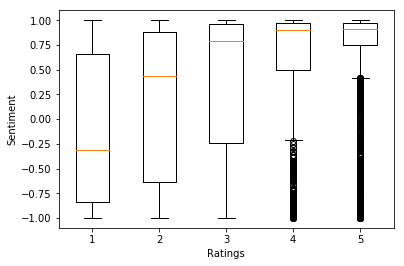

In [41]:
# MOVIE.CSV

# running the same code, except opening movie.csv and renaming variables 

movie_list=[]

with open('movie.csv', 'r') as f:
    movie = csv.reader(f.read().splitlines())
    for m in movie: 
        movie_list.append(m)

del movie_list[0]

movie_sentiment_scores = []
movie_rating_scores=[]

for movie in movie_list: 
    movie_polarity = sid.polarity_scores(movie[0])
    movie_sentiment_scores.append(movie_polarity.get("compound"))
    movie_rating_scores.append(movie[1])

movie_rating_scores_int = [int(float(x)) for x in movie_rating_scores]
print(numpy.corrcoef(movie_rating_scores_int, movie_sentiment_scores))
draw_box_plot(movie_rating_scores_int, movie_sentiment_scores) 


In [107]:
# ANALYSIS for beer reviews

# running the same analysis but using different variables

pre_movie_comparison = []
for i in range(len(beer_rating_scores_int)): 
    pre_movie_comparison.append([movie_sentiment_scores[i], movie_rating_scores_int[i], movie_list[i][0]])
movie_comparison=sorted(pre_movie_comparison)

movie_negatives= ""
movie_positives = ""
for i in range(50): 
    movie_negatives += movie_comparison[i][2]
    movie_positives += movie_comparison[-i-1][2]
    
print ("Reviews with most negative sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, movie_comparison[i][2][0:300]))
    
print ("\n Reviews with most positive sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, movie_comparison[-i-1][2][0:300]))

movie_product_2 = ""
for i in range(len(movie_list)): 
    movie_product_2 += movie_list[i][0] 
    
movie_product_tokens = nltk.word_tokenize(movie_product_2)    
movie_negative_tokens = nltk.word_tokenize(movie_negatives)
movie_positive_tokens = nltk.word_tokenize(movie_positives)

movie_product_text = nltk.Text(movie_product_tokens)
movie_negative_text = nltk.Text(movie_negative_tokens)
movie_positive_text = nltk.Text(movie_positive_tokens)

movie_product_fdist=FreqDist(movie_product_text)
movie_negative_fdist=FreqDist(movie_negative_text)
movie_positive_fdist=FreqDist(movie_positive_text)

movie_product_common= []
for i in range(500): 
    movie_product_common.append(movie_product_fdist.most_common(500)[i][0])
movie_product_common= set(movie_product_common)

movie_unique_negatives= []
for i in range(300): 
    movie_n = movie_negative_fdist.most_common(300)[i][0]
    if movie_n not in movie_product_common :
        movie_unique_negatives.append(movie_n)
print ("\nWords uniquely associated with reviews with most negative sentiment scores:")
print (movie_unique_negatives)

movie_unique_positives= []
for i in range(300): 
    movie_n = movie_positive_fdist.most_common(300)[i][0]
    if movie_n not in movie_product_common :
        movie_unique_positives.append(movie_n)
print ("\nWords uniquely associated with reviews with most positive sentiment scores:")
print (movie_unique_positives)

Reviews with most negative sentiment scores: 
1.)  I've been waiting and waiting for this. Now I can get the DVD Season Sets.<br /><br />Right now I have the Cartoon Network's [adult swim] made for TV recorded on my PC. The [adult swim] episodes run from season 1 to season 3 and season 3 is just a partial set. It's missing episodes: 050 - The Book ...
2.)  I give this movie 1 star it would have gotten half a star but that is not an option.<br /><br />Tyler Perry's first problem was relying on Janet Jackson to carry the film. She is not the greatest actress in the world and I understand that her brother Michael Jackson died while she made this movie, ...
3.)  I have never been one of those viewers who are into serial killer films. I find most of them sickening and quite a few have a bit more gore than I like in my films--and not enough suspense. There are the few exceptions: And one of these is the South Korean thriller "H". However, this film does have...

 Reviews with most positive s

[[1.         0.51653668]
 [0.51653668 1.        ]]


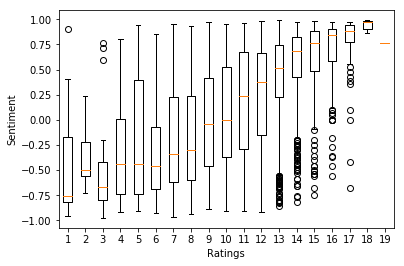

In [34]:
# BEER.CSV

# running the same code, except opening beer.csv and renaming the variables 

beer_list=[]

with open('beer.csv', 'r') as f:
    beer = csv.reader(f.read().splitlines())
    for b in beer: 
        beer_list.append(b)

del beer_list[0]

beer_sentiment_scores = []
beer_rating_scores=[]

for beer in beer_list: 
    beer_polarity = sid.polarity_scores(beer[0])
    beer_sentiment_scores.append(beer_polarity.get("compound"))
    beer_rating_scores.append(beer[1])

beer_rating_scores_int = [int(float(x)) for x in beer_rating_scores]
print(numpy.corrcoef(beer_rating_scores_int, beer_sentiment_scores))
draw_box_plot(beer_rating_scores_int, beer_sentiment_scores) 

In [35]:
# ANALYSIS for movie reviews

# running the same analysis but using different variables

pre_beer_comparison = []
for i in range(len(beer_rating_scores_int)): 
    pre_beer_comparison.append([beer_sentiment_scores[i], beer_rating_scores_int[i], beer_list[i][0]])
beer_comparison=sorted(pre_beer_comparison)
    
beer_negatives= ""
beer_positives = ""
for i in range(50): 
    beer_negatives += beer_comparison[i][2]
    
for i in range(50):
    beer_positives += beer_comparison[-i-1][2]
    
print ("Reviews with most negative sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, beer_comparison[i][2][0:300]))
    
print ("\n Reviews with most positive sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, beer_comparison[-i-1][2][0:300]))

beer_product_2 = ""
for i in range(len(beer_list)): 
    beer_product_2 += beer_list[i][0] 
    
beer_product_tokens = nltk.word_tokenize(beer_product_2)    
beer_negative_tokens = nltk.word_tokenize(beer_negatives)
beer_positive_tokens = nltk.word_tokenize(beer_positives)

beer_product_text = nltk.Text(beer_product_tokens)
beer_negative_text = nltk.Text(beer_negative_tokens)
beer_positive_text = nltk.Text(beer_positive_tokens)

beer_product_fdist=FreqDist(beer_product_text)
beer_negative_fdist=FreqDist(beer_negative_text)
beer_positive_fdist=FreqDist(beer_positive_text)

beer_product_common= []
for i in range(500): 
    beer_product_common.append(beer_product_fdist.most_common(500)[i][0])
beer_product_common= set(beer_product_common)

beer_unique_negatives= []
for i in range(300): 
    beer_n = beer_negative_fdist.most_common(300)[i][0]
    if beer_n not in beer_product_common :
        beer_unique_negatives.append(beer_n)
print ("\nWords uniquely associated with reviews with most negative sentiment scores:")
print (beer_unique_negatives)

beer_unique_positives= []
for i in range(300): 
    beer_n = beer_positive_fdist.most_common(300)[i][0]
    if beer_n not in beer_product_common :
        beer_unique_positives.append(beer_n)
print ("\nWords uniquely associated with reviews with most positive sentiment scores:")
print (beer_unique_positives)



Reviews with most negative sentiment scores: 
1.) Thin yellowish beige head. Hazy light amber body with carbonation. Sugary malty musty aroma with notes of cabbage and alcohol. Dry-sweet malt and vomit taste with fruity chocolate and cabbage notes. Lots of alcohol heat. Somehow this violently disagreed with me. My tasting notes end &quot;HATED IT! ...
2.) Coarse lace above somewhat creamy, white, medium-sized head. Clear copper body. Aroma is standard Ringnes caramel malts with some butter. Taste is buttery caramel with skunked hops (from a can!). Some bitterness, but no proper aftertaste. This is very, very poor.  Has to be one of the worst pilsener...
3.) Small white head quickly disappears, leaving only thin ring round the edge. Copper body, with some ongoing carbonation. Aroma is watery and unbalanced, but brings up many associations. Strong butter odour with roasty caramel notes and maybe a touch of wood and metal. It's really bad, but I'm saving ...

 Reviews with most positive s

[[1.         0.59138809]
 [0.59138809 1.        ]]


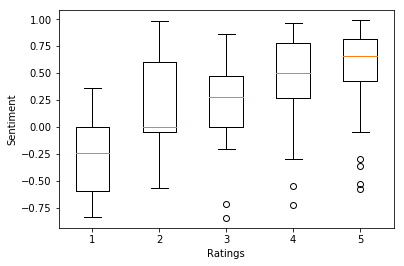

In [36]:
# UMBRELLA.CSV

# running the same code, except opening umbrella.csv and renaming variables 

umbrella_list=[]

with open('umbrella.csv', 'r', encoding="utf8", errors='ignore') as f:
    umbrella = csv.reader(f.read().splitlines())
    for u in umbrella: 
        umbrella_list.append(u)

del umbrella_list[0]

umbrella_sentiment_scores = []
umbrella_rating_scores=[]

for umbrella in umbrella_list: 
    if umbrella[5] == "": 
        umbrella_polarity = sid.polarity_scores(umbrella[4])
    else: 
        umbrella_polarity = sid.polarity_scores(umbrella[5])
    umbrella_sentiment_scores.append(umbrella_polarity.get("compound"))
    umbrella_rating_scores.append(umbrella[0])

umbrella_rating_scores_int = [int(float(x)) for x in umbrella_rating_scores]
print(numpy.corrcoef(umbrella_rating_scores_int, umbrella_sentiment_scores))
draw_box_plot(umbrella_rating_scores_int, umbrella_sentiment_scores) 




In [50]:
# ANALYSIS for umbrella reviews

# running the same analysis but using different variables

pre_umbrella_comparison = []
for i in range(len(umbrella_rating_scores_int)): 

    if umbrella_list[i][5]=="": 
        pre_umbrella_comparison.append([umbrella_sentiment_scores[i], umbrella_rating_scores_int[i], umbrella_list[i][4]])
    else: 
        pre_umbrella_comparison.append([umbrella_sentiment_scores[i], umbrella_rating_scores_int[i], umbrella_list[i][5]])
    umbrella_comparison=sorted(pre_umbrella_comparison)

umbrella_negatives= ""
umbrella_positives = ""
for i in range(50): 
    umbrella_negatives += umbrella_comparison[i][2]
    
for i in range(50):
    umbrella_positives += umbrella_comparison[-i-1][2]
    
print ("Reviews with most negative sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, umbrella_comparison[i][2][0:300]))
    
print ("\n Reviews with most positive sentiment scores: ")
for i in range(3): 
    print ("{}.) {}...".format(i+1, umbrella_comparison[-i-1][2][0:300]))

umbrella_product_2 = ""
for i in range(len(umbrella_list)): 
    if umbrella_list[i][5] == "": 
        umbrella_product_2 += umbrella_list[i][4] 
    else: 
        umbrella_product_2 += umbrella_list[i][5] 
    
umbrella_product_tokens = nltk.word_tokenize(umbrella_product_2)    
umbrella_negative_tokens = nltk.word_tokenize(umbrella_negatives)
umbrella_positive_tokens = nltk.word_tokenize(umbrella_positives)

umbrella_product_text = nltk.Text(umbrella_product_tokens)
umbrella_negative_text = nltk.Text(umbrella_negative_tokens)
umbrella_positive_text = nltk.Text(umbrella_positive_tokens)

umbrella_product_fdist=FreqDist(umbrella_product_text)
umbrella_negative_fdist=FreqDist(umbrella_negative_text)
umbrella_positive_fdist=FreqDist(umbrella_positive_text)

umbrella_product_common= []
for i in range(500): 
    umbrella_product_common.append(umbrella_product_fdist.most_common(500)[i][0])
umbrella_product_common= set(umbrella_product_common)

umbrella_unique_negatives= []
for i in range(300): 
    umbrella_n = umbrella_negative_fdist.most_common(300)[i][0]
    if umbrella_n not in umbrella_product_common :
        umbrella_unique_negatives.append(umbrella_n)
print ("\nWords uniquely associated with reviews with most negative sentiment scores:")
print (umbrella_unique_negatives)

umbrella_unique_positives= []
for i in range(300): 
    umbrella_n = umbrella_positive_fdist.most_common(300)[i][0]
    if umbrella_n not in umbrella_product_common :
        umbrella_unique_positives.append(umbrella_n)
print ("\nWords uniquely associated with reviews with most positive sentiment scores:")
print (umbrella_unique_positives)





Reviews with most negative sentiment scores: 
1.) Failed on me in a bad way - had only used it a dozen times, suddenly it would not close.  I had a long bus ride with an open umbrella.  Would have thrown it away but weather was bad at destination and I had a mile walk once there....
2.) I very rarely write reviews, but I felt this deserved one.  The first time I used this umbrella, it flipped inside out within thirty seconds of opening it, rendering it useless for its intended purpose. I was drenched, and very unhappy.  Will be returning (another thing I very rarely do)....
3.) One thunderstorm and the umbrella is already broken. Not sure if we got a dud, but have no idea how this is rated so highly. Windproof claim is completely inaccurate. Would not recommend....

 Reviews with most positive sentiment scores: 
1.) I've just bought it because of the rainy season in IN but already had an opportunity to test the quality of the purchase. It's totally awesome! This umbrella protects me fr